# Data
In this specfi task i decided to use maritl, jobclass, health and health_ins to predict wage. All of this features will be transformed to dummy variables (like 0/1)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.model_selection import train_test_split

data = load_data('Wage')


X, y = data[['maritl', 'jobclass', 'health', 'health_ins']], data[['wage']]

X

,maritl,jobclass,health,health_ins
0,1. Never Married,1. Industrial,1. <=Good,2. No
1,1. Never Married,2. Information,2. >=Very Good,2. No
2,2. Married,1. Industrial,1. <=Good,1. Yes
3,2. Married,2. Information,2. >=Very Good,1. Yes
4,4. Divorced,2. Information,1. <=Good,1. Yes
...,...,...,...,...
2995,2. Married,1. Industrial,2. >=Very Good,1. Yes
2996,2. Married,1. Industrial,2. >=Very Good,2. No
2997,2. Married,1. Industrial,1. <=Good,2. No
2998,1. Never Married,1. Industrial,2. >=Very Good,1. Yes


## Nominal Values to numbers


In [42]:
def transform_x(row):
    Result = {}

    #Merrige
    Result['merried'] = 1 if row['maritl'] == '2. Married' or row['maritl'] == '5. Separated' else 0
    Result['divorced'] = 1 if row['maritl'] == '4. Divorced' else 0
    Result['Separated'] = 1 if row['maritl'] == '5. Separated' else 0

    #job class
    Result['indrustial'] = 1 if row['jobclass'] == '1. Industrial' else 0

    #health & ins
    Result['health'] = 1 if row['health'] == '2. >=Very Good' else 0
    Result['health_ins'] = 1 if row['health_ins'] == '1. Yes' else 0

    return pd.Series(Result)


X_num = X.apply(transform_x, axis=1)

X_num

,merried,divorced,Separated,indrustial,health,health_ins
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,1,0,0,1,0,1
3,1,0,0,0,1,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
2995,1,0,0,1,1,1
2996,1,0,0,1,1,0
2997,1,0,0,1,0,0
2998,0,0,0,1,1,1


## Data Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

x_train

,merried,divorced,Separated,indrustial,health,health_ins
642,0,1,0,0,0,1
700,0,0,0,1,1,1
226,0,0,0,1,1,0
1697,1,0,0,0,1,1
1010,1,0,0,0,1,0
...,...,...,...,...,...,...
1638,1,0,0,0,1,1
1095,1,0,0,1,1,1
1130,1,0,0,0,1,0
1294,1,0,0,0,1,1


## Data Vizualization

## correlation matrix

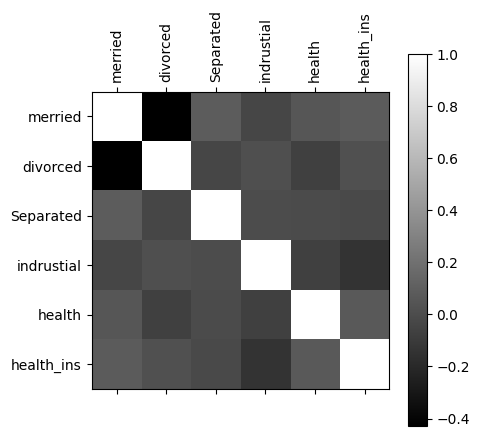

Variance
merried       0.455762
divorced      0.257989
Separated     0.128046
indrustial    0.500054
health        0.452495
health_ins    0.459077
dtype: float64


,merried,divorced,Separated,indrustial,health,health_ins
merried,1.000000,-0.430389,0.084047,-0.038408,0.051176,0.079737
divorced,-0.430389,1.000000,-0.036173,0.015450,-0.070063,0.020718
Separated,0.084047,-0.036173,1.000000,-0.001845,-0.010911,-0.013710
indrustial,-0.038408,0.015450,-0.001845,1.000000,-0.071145,-0.141399
health,0.051176,-0.070063,-0.010911,-0.071145,1.000000,0.076557
health_ins,0.079737,0.020718,-0.013710,-0.141399,0.076557,1.000000


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

names = X_num.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

print('Variance')
print(df_features.std())
corr_mtx